> # Projeto: Estatística I
**Professor:** Alex Lima

<font size=4.5><center><b>Série Histórica de Preços de Combustíveis e de GLP - 2020 a 2023 (primeiro trimestre)</b></center></font>

<p style='text-align: justify;'><font size=3>Em cumprimento às determinações da Lei do Petróleo, a ANP acompanha os preços praticados por revendedores de combustíveis automotivos por meio de uma pesquisa semanal de preços. Com base nesses dados, o objetivo será realizar uma análise de variação dos preços de venada ao consumidor final para investigar as tendências de variação ao longo do tempo para entender se houve aumentos ou diminuições significativas.</font></p>

<font size=2><b>Fonte dos dados</b>:https://www.gov.br/anp/pt-br/centrais-de-conteudo/dados-abertos/serie-historica-de-precos-de-combustiveis</font>

<font size=2>Para baixar a base concatenada, acesso o drive: https://drive.google.com/drive/folders/15TuhTG7ub1BzqedTzEyqtPpDNz0pgBgF?usp=sharing</font>

<font size=4.5><center><b>Dicionário dos dados</b></center></font>

|Campos|Descrição|Tipo|
|---|---|---|
|Regiao - Sigla|Sigla da Região da revenda pesquisada|alfanumérico|
|Estado - Sigla|Sigla da Unidade Federativa (UF) da revenda pesquisada|alfanumérico|
|Municipio|Nome do município da revenda pesquisada|alfanumérico|
|CNPJ da Revenda|Número do Cadastro Nacional de Pessoa Jurídica da revenda pesquisada|numérico|
|Nome da Rua|Nome do logradouro da revenda pesquisada|alfanumérico|
|Numero Rua|Número do logradouro da revenda pesquisada|alfanumérico|
|Complemento|Complemento do logradouro da revenda pesquisada|alfanumérico|
|Bairro|Nome do bairro da revenda pesquisada|alfanumérico|
|Cep|Número do CEP do logradouro da revenda pesquisada|alfanumérico|
|Produto|Nome do combustível pesquisado|alfanumérico|
|Data da Coleta |Data da coleta do(s) preço(s)|data|
|Valor de Venda|Preço de venda ao consumidor final|numérico|
|Valor de Compra|preço de venda da distribuidora para o posto|numérico|
|Unidade de Medida|Unidade de Medida|alfanumérico|
|Bandeira|Noma da Bandeira da revenda|alfanumérico|

### Imports necessários

In [1]:
"""
    Bibliotecas básicas de DS
"""
import warnings
import numpy as np
import pandas as pd

"""
    Bibliotecas de visualização de dados
"""
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
%matplotlib inline

"""
 Bibliotecas para análise do dataset
"""
import sidetable

warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 200)
np.set_printoptions(suppress=True, precision=3)

### Conjunto de dados

In [2]:
df = pd.read_csv('data/serie_historica_preco_combustivel.csv')
print(f'Linhas: {df.shape[0]} | Colunas: {df.shape[1]}')
df.head(1)

Linhas: 2865915 | Colunas: 16


,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira
0,SE,SP,SOROCABA,COMPETRO COMERCIO E DISTRIBUICAO DE DERIVADOS ...,00.003.188/0001-21,RUA HUMBERTO DE CAMPOS,306,NaN,JARDIM ZULMIRA,18061-000,ETANOL,03/01/2023,"3,39",NaN,R$ / litro,BRANCA


### Informação dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2865915 entries, 0 to 2865914
Data columns (total 16 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   Regiao - Sigla     object
 1   Estado - Sigla     object
 2   Municipio          object
 3   Revenda            object
 4   CNPJ da Revenda    object
 5   Nome da Rua        object
 6   Numero Rua         object
 7   Complemento        object
 8   Bairro             object
 9   Cep                object
 10  Produto            object
 11  Data da Coleta     object
 12  Valor de Venda     object
 13  Valor de Compra    object
 14  Unidade de Medida  object
 15  Bandeira           object
dtypes: object(16)
memory usage: 349.8+ MB


#### Valores nulos

In [4]:
df.stb.missing()

,missing,total,percent
Valor de Compra,2709903,2865915,94.556294
Complemento,2222572,2865915,77.551916
Bairro,7497,2865915,0.261592
Numero Rua,1330,2865915,0.046408
Regiao - Sigla,0,2865915,0.000000
Estado - Sigla,0,2865915,0.000000
Municipio,0,2865915,0.000000
Revenda,0,2865915,0.000000
CNPJ da Revenda,0,2865915,0.000000
Nome da Rua,0,2865915,0.000000


<p style='text-align: justify;'><font size=3.> Por não ser muito relevante para a análise, as colunas com valores nulos, serão removidas.</font></p>

In [5]:
df.drop(['Complemento', 'Valor de Compra', 'Bairro', 'Numero Rua'], axis=1, inplace=True)
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)
print(f'Linhas: {df.shape[0]} | Colunas: {df.shape[1]}')

Linhas: 2865915 | Colunas: 12


### Correção tipo de dados

In [6]:
def convertValues(value: str) -> float:
    """
        Método responsável por converter valores de string para float
    """
    value = value.replace(',', '.')
    return float(value)

df['Data da Coleta'] = pd.to_datetime(df['Data da Coleta'])
df['Valor de Venda'] = df['Valor de Venda'].apply(convertValues)

mapRegiao = {'NE': 'nordeste', 'N': 'norte', 'CO': 'centro oeste', 'SE': 'sudeste', 'S': 'sul'}
df['Regiao - Sigla'] = df['Regiao - Sigla'].map(mapRegiao)

### Seleção de features

> Removidas as features não relevantes para as análises

In [7]:
df['ano_coleta'] = df['Data da Coleta'].dt.year
df.drop(['CNPJ da Revenda', 'Nome da Rua', 'Cep', 'Unidade de Medida'], axis=1, inplace=True)
df = df.rename(columns={'Regiao - Sigla': 'regiao', 'Estado - Sigla': 'uf', 'Municipio': 'municipio', 'Revenda': 'revenda', 'Produto': 'produto', 'Data da Coleta': 'data_coleta', 'Valor de Venda': 'valor_venda', 'Bandeira': 'bandeira'})

### Base final

In [8]:
df.head()

,regiao,uf,municipio,revenda,produto,data_coleta,valor_venda,bandeira,ano_coleta
0,sudeste,SP,SOROCABA,COMPETRO COMERCIO E DISTRIBUICAO DE DERIVADOS ...,ETANOL,2023-03-01,3.39,BRANCA,2023
1,sudeste,SP,SOROCABA,COMPETRO COMERCIO E DISTRIBUICAO DE DERIVADOS ...,DIESEL S10,2023-03-01,6.21,BRANCA,2023
2,sudeste,SP,SOROCABA,COMPETRO COMERCIO E DISTRIBUICAO DE DERIVADOS ...,GASOLINA,2023-03-01,4.39,BRANCA,2023
3,nordeste,AL,ARAPIRACA,COMERCIAL DE COMBUSTIVEIS E LUBRIFICANTES VITA...,ETANOL,2023-02-01,3.89,VIBRA ENERGIA,2023
4,nordeste,AL,ARAPIRACA,COMERCIAL DE COMBUSTIVEIS E LUBRIFICANTES VITA...,DIESEL,2023-02-01,6.49,VIBRA ENERGIA,2023


### Resumo Estatístico

In [9]:
df[['valor_venda']].describe().round(3)

,valor_venda
count,2865915.000
mean,5.116
std,1.306
min,1.799
25%,4.079
50%,5.090
75%,5.999
max,9.650


<p style='text-align: justify;'><font size=3.>Em média, o preço de venda é de aproximadamente R\$ 5,11 reais, com uma variação de R\$ 1,31.</font></p>

<p style='text-align: justify;'><font size=3.>O preço mínimo de venda encontrado é de R\$ 1,80 reais (2020), enquanto o preço máximo é de R\$ 9,65 reais (2022). Essa faixa de preços indica que houve uma considerável variação nos preços de venda ao consumidor final. Esses preços são afetados por diversos fatores como impostos, lucro do produtor, custo do etanol, etc e provavelmente a situação econômica do país devido ao Governo e/ou à pandemia tiveram sua contribuição nessa variação.</font></p>


<p style='text-align: justify;'><font size=3.>A mediana dos preços de venda é de R\$ 5,09 reais. O que indica que metade dos preços de venda, nessa amostra, está abaixo desse valor e metade está acima.</font></p>

In [10]:
df.describe(include='O')

,regiao,uf,municipio,revenda,produto,bandeira
count,2865915,2865915,2865915,2865915,2865915,2865915
unique,5,27,469,17488,6,74
top,sudeste,SP,SAO PAULO,SIM REDE DE POSTOS LTDA,GASOLINA,BRANCA
freq,1394339,848064,108097,17644,758103,1011375


<p style='text-align: justify;'><font size=3.>Nessa base temos que a região mais frequente nas coletas dos dados foi a sudeste, sendo São Paulo o estado e a cidade mais recorrente. Temos também que, postos de bandeira branca e gasolina são os mais comuns nos dados e a revenda que mais aparece é a rede de postos SIM. </font></p>

## Análise do preço de venda para o consumidor final

### Distribuição dos dados

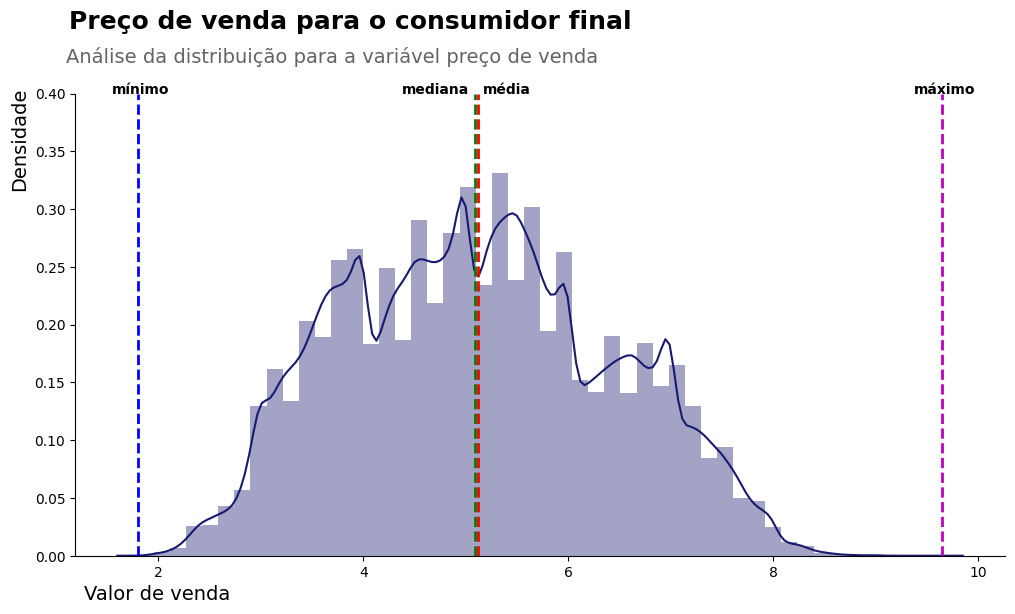

In [11]:
suptitle = 'Preço de venda para o consumidor final'
title = 'Análise da distribuição para a variável preço de venda'

ax = sns.distplot(df['valor_venda'], kde=True, color='#191970')
ax.figure.set_size_inches(12, 6)
ax.set_ylabel('Densidade', fontsize=14, horizontalalignment='left', y=0.79)
ax.set_xlabel('Valor de venda', fontsize=14, horizontalalignment='left', x=0.01)
ax.spines[['top', 'right']].set_visible(False)

plt.axvline(x=1.799, color='b', linestyle='dashed', linewidth=2, label='Mínimo')
plt.axvline(x=5.090, color='g', linestyle='dashed', linewidth=2, label='Mediana')
plt.axvline(x=5.116, color='r', linestyle='dashed', linewidth=2, label='Média')
plt.axvline(x=9.650, color='m', linestyle='dashed', linewidth=2, label='Máximo')

plt.text(1.83, 0.4, 'mínimo', fontsize=10, weight='bold', horizontalalignment='center')
plt.text(4.7, 0.4, 'mediana', fontsize=10, weight='bold', horizontalalignment='center')
plt.text(5.4, 0.4, 'média', fontsize=10, weight='bold', horizontalalignment='center')
plt.text(9.67, 0.4, 'máximo', fontsize=10, weight='bold', horizontalalignment='center')

plt.suptitle(suptitle, fontsize=18, y=1.02, horizontalalignment='left', x=0.12, color='black', weight='bold')
plt.title(title, fontsize=14, color='#646464', y=1.05, loc='left', x=-0.01)
plt.ylim(0.0, 0.4)
plt.grid(False)
plt.savefig('img/distribuicao_preco_venda.png', dpi=300, bbox_inches='tight')
plt.show()

<p style='text-align: justify;'><font size=3.>A maior parte dos dados está concentrada em torno da média de 5,12 reais, com uma dispersão moderada em ambas as direções (1.306). Temos os picos mais altos próximo desse valor e a medida que aproxima dos valores mínimos e máximo(1.80 - 9.65), esses picos começam a diminuir. A mediana (5.09) divide a distribuição em duas partes aproximadamente iguais. Como podemos reparar, a média e a mediana são próximas, o que geralmente significa que a distribuição é aproximadamente simétrica, se aproximando da distribuição normal. Isso indica que os valores não tendem a se concentrar em um dos lados da distribuição.</font></p>

### Variação média dos preços ao longo do tempo

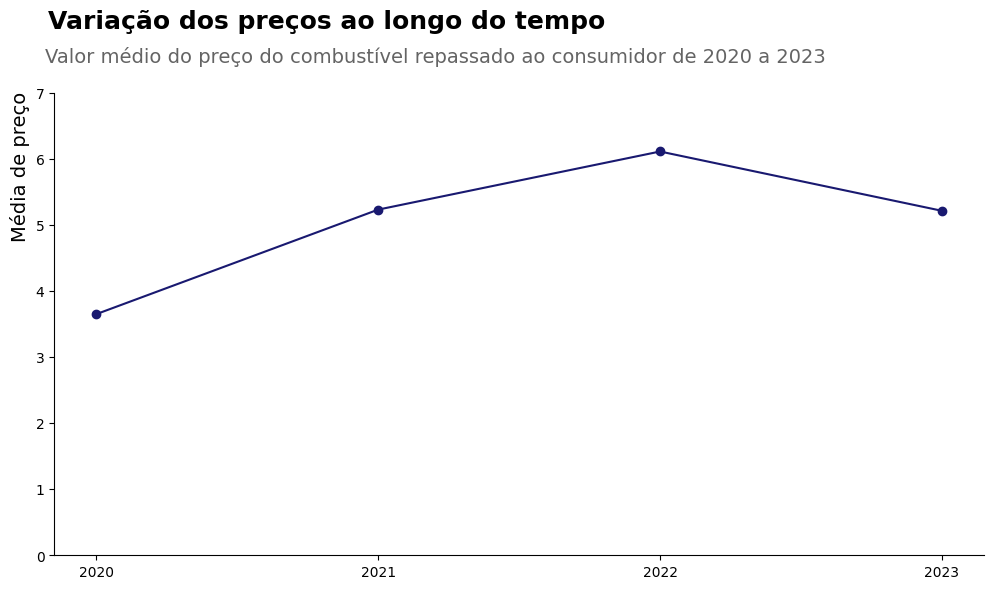

In [12]:
suptitle = 'Variação dos preços ao longo do tempo'
title = 'Valor médio do preço do combustível repassado ao consumidor de 2020 a 2023'
ticks = [2020, 2021, 2022, 2023]

dados_agrupados = df.groupby('ano_coleta')['valor_venda'].mean()
dados_agrupados.plot.line(figsize=(12, 6), rot=False, color='#191970', marker='o').spines[['top', 'right']].set_visible(False)

plt.suptitle(suptitle, fontsize=18, y=1.02, horizontalalignment='left', x=0.12, color='black', weight='bold')
plt.title(title, fontsize=14, color='#646464', y=1.05, loc='left', x=-0.01)
plt.ylabel('Média de preço', fontsize=14, horizontalalignment='left', y=0.68)
plt.xlabel(None)
plt.xticks(ticks)
plt.ylim(0, 7)
plt.grid(False)
plt.show()

<p style='text-align: justify;'><font size=3.>Em 2020, estávamos pagando, em média, R\$3.65 pelo litro da gasolina. Em 2021, houve um aumento significativo nos preços, com o valor médio atingindo cerca de R\$ 5.24/litro, essa tendência de aumento continuou chegando a uma alta de R\$ 6,12. No início de 2023, os preços de venda diminuíram em relação a 2022, mas ainda se mantiveram superiores aos de 2020. Repare que essa flutuação, possivelmente, está relacionada à pandemia, que começou em 2020 e gerou uma série de desafios em todo o mundo que afetaram a economia. Além disso, temos a adoção da política de preços de combustíveis que acompanha os preços internacionais, além de outras possíveis causas. </font></p>

### Análise por Região

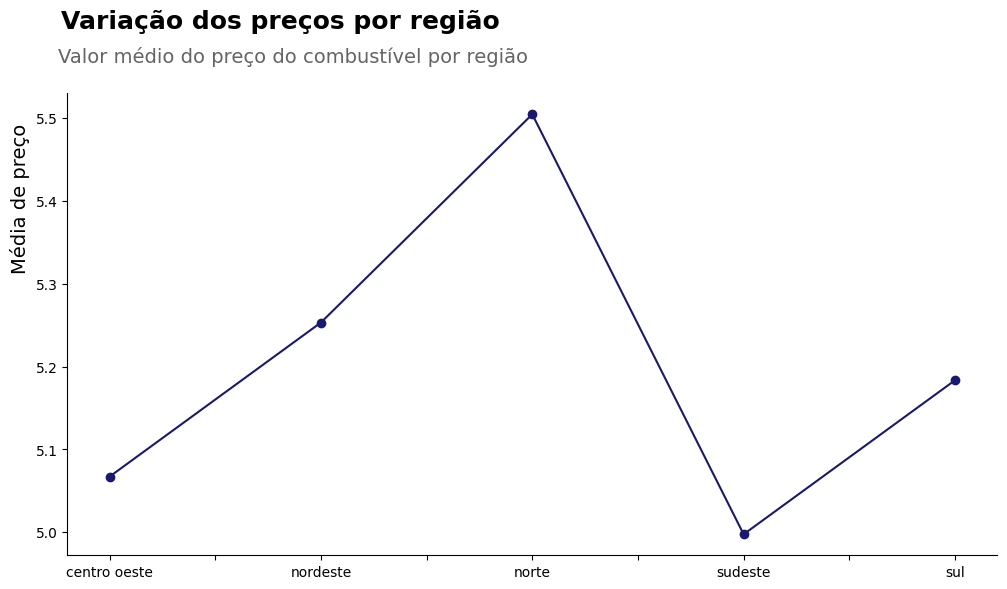

In [13]:
suptitle = 'Variação dos preços por região'
title = 'Valor médio do preço do combustível por região'

dados_agrupados = df.groupby('regiao')['valor_venda'].mean()
dados_agrupados.plot.line(figsize=(12, 6), rot=False, color='#191970', marker='o').spines[['top', 'right']].set_visible(False)

plt.suptitle(suptitle, fontsize=18, y=1.02, horizontalalignment='left', x=0.12, color='black', weight='bold')
plt.title(title, fontsize=14, color='#646464', y=1.05, loc='left', x=-0.01)
plt.ylabel('Média de preço', fontsize=14, horizontalalignment='left', y=0.61)
plt.xlabel(None)
plt.grid(False)
plt.show()

<p style='text-align: justify;'><font size=3.>Pelo gráfico, podemos ver que as regiões Norte (5.50) e Nordeste (5.25) têm as médias de preços mais altas durante o período analisado, enquanto a região Sudeste (4.99) apresenta a média mais baixa. Essas variações podem estar relacionadas às diferenças nas políticas de preços ou aos custos de transporte. Podemos ver, também que todas as regiões experimentaram variações nos preços ao longo dos anos analisados.</font></p>

### Análise por estado

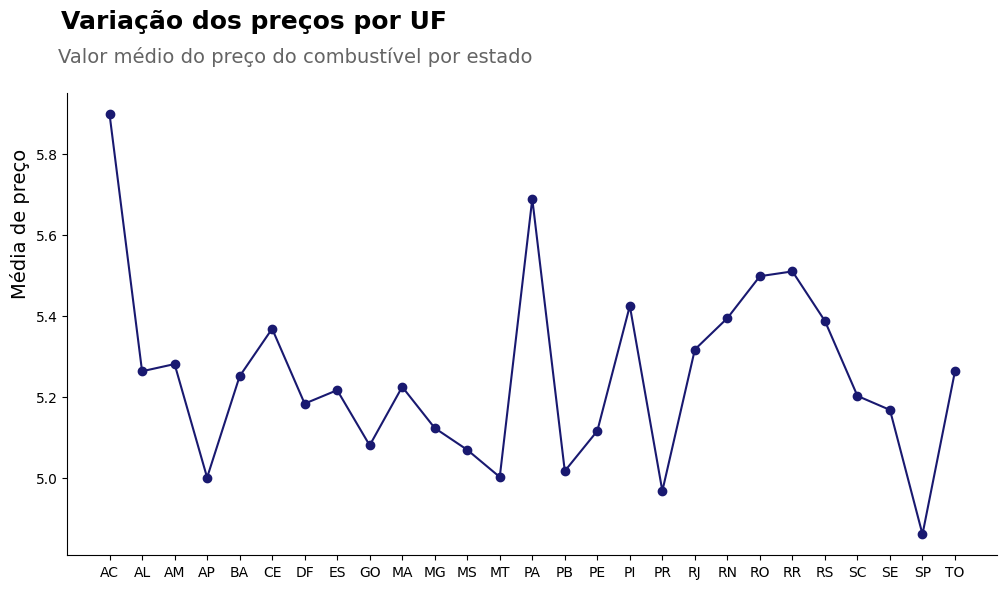

In [14]:
suptitle = 'Variação dos preços por UF'
title = 'Valor médio do preço do combustível por estado'

ticks = ['AC', 'AL', 'AM', 'AP', 'BA', 'CE', 'DF', 'ES', 'GO', 'MA', 'MG', 'MS', 'MT', 'PA', 'PB', 'PE', 'PI', 'PR', 'RJ', 'RN', 'RO', 'RR', 'RS', 'SC', 'SE', 'SP', 'TO']

dados_agrupados = df.groupby('uf')['valor_venda'].mean()
dados_agrupados.plot.line(figsize=(12, 6), rot=False, color='#191970', marker='o').spines[['top', 'right']].set_visible(False)

plt.suptitle(suptitle, fontsize=18, y=1.02, horizontalalignment='left', x=0.12, color='black', weight='bold')
plt.title(title, fontsize=14, color='#646464', y=1.05, loc='left', x=-0.01)
plt.ylabel('Média de preço', fontsize=14, horizontalalignment='left', y=0.556)
plt.xlabel(None)
plt.xticks(range(len(ticks)), ticks)
plt.grid(False)
plt.show()

<p style='text-align: justify;'><font size=3.>Podemos ver que há variações significativas nos preços médios dos combustíveis entre os estados. Alguns estados, como Acre (AC), Amapá (AP), Amazonas (AM), Pará (PA), Roraima (RR), e Rondônia (RO), têm preços médios consideravelmente mais altos em comparação com outros estados. Por outro lado, estados como São Paulo (SP) e Paraná (PR) têm preços médios mais baixos. Isso pode estar relacionado a váris fatores, como a carga tributária estadual e federal, presença de refinarias nos estados e etc.</font></p>

### Variação percentual trimestral

> Analisa como os valores de uma variável mudam em termos percentuais em relação aos valores anteriores. Para isso, calcula-se a diferença percentual entre um valor e o valor anterior na série.

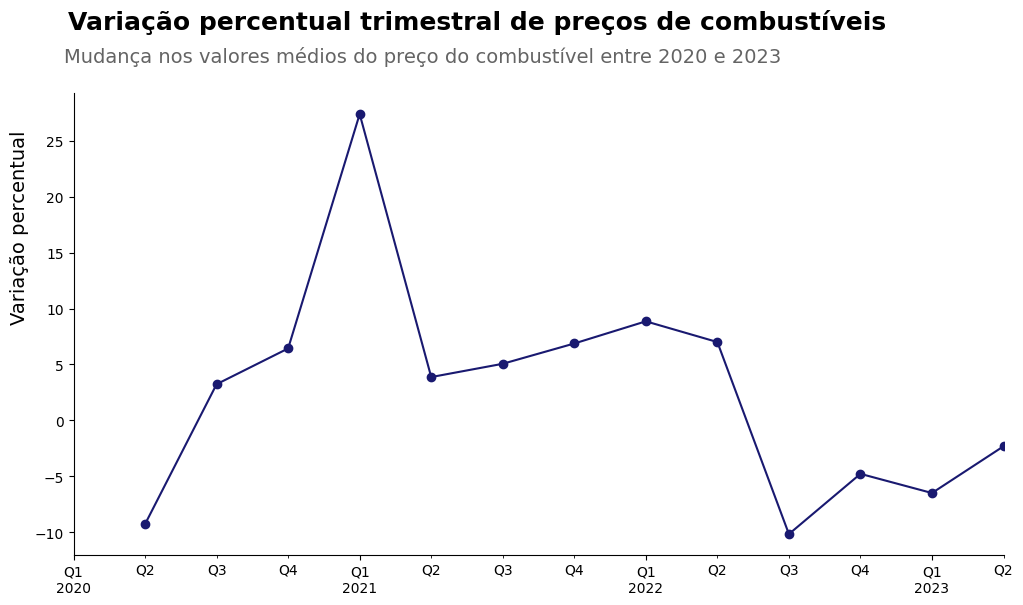

In [46]:
suptitle = 'Variação percentual trimestral de preços de combustíveis'
title = 'Mudança nos valores médios do preço do combustível entre 2020 e 2023'

dados_agrupados = df.groupby(pd.Grouper(key='data_coleta', freq='Q')).agg({'valor_venda': 'mean'})[:-2]
dados_agrupados['variacao_percentual'] = dados_agrupados['valor_venda'].pct_change() * 100
dados_agrupados.drop(['valor_venda'], axis=1).plot.line(figsize=(12, 6), rot=False, color='#191970', marker='o', legend=False).spines[['top', 'right']].set_visible(False)

plt.suptitle(suptitle, fontsize=18, y=1.02, horizontalalignment='left', x=0.12, color='black', weight='bold')
plt.title(title, fontsize=14, color='#646464', y=1.05, loc='left', x=-0.01)
plt.xlabel(None)
plt.ylabel('Variação percentual', fontsize=14, horizontalalignment='left', y=0.50)
plt.grid(False)
plt.show()

<p style='text-align: justify;'><font size=3.>Não houve variação no primeiro trimestre de 2020, porque não temos dados para comparação. A partir do segundo trimestre de 2020, houve uma queda significativa nos preços, com uma variação negativa de cerca de -9,26%. A partir do terceiro trimestre de 2020, os preços começaram a se recuperar, com uma variação positiva de cerca de 3,24% e manteve essa tendência de recuperação até o último trimestre, quando a variação foi de aproximadamente 6,43%.</font></p>

<p style='text-align: justify;'><font size=3.>Em 2021, houve um aumento significativo nos preços de combustíveis, especialmente no primeiro trimestre, com uma variação percentual muito alta de cerca de 27,37%. Ao longo de 2021, os preços continuaram a subir, mas em uma taxa menor.</font></p>

<p style='text-align: justify;'><font size=3.>Em 2022, os preços mantiveram uma tendência de alta, com uma queda acentuada de aproximadamente -10,15%, possivelmente devido a limitação do ICMS aprovada pelo Congresso Nacional no final de junho.</font></p>

<p style='text-align: justify;'><font size=3.>O último trimestre de 2022 e nos primeiros dois trimestres de 2023, os preços continuaram a diminuir, com variações percentuais negativas.</font></p>